In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('online_retail[1].csv')
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 9)

In [4]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

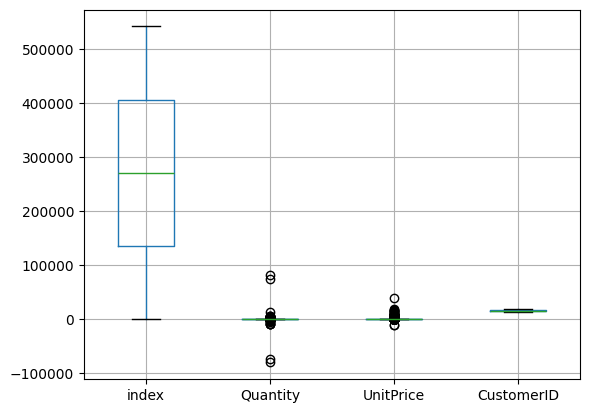

In [5]:
df.boxplot()

<Figure size 300x500 with 0 Axes>

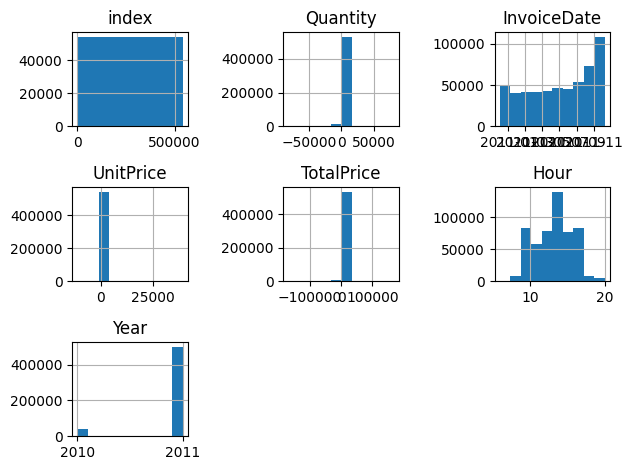

In [136]:
plt.figure(figsize=(3,5))
df.hist();
plt.tight_layout()
plt.show()

# Preprocessing  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [7]:
# Fill null values.
df['CustomerID']=df['CustomerID'].fillna('Guest')

In [8]:
df.isnull().sum()

index             0
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [9]:
# instead of delete or fill with central tendency that null values i fill that values with "Guest" that show , there are customer that are unknown .

In [10]:
df['Description'].isnull().sum()

np.int64(1454)

In [11]:
df['Description']=df['Description'].fillna("No description")

In [12]:
df.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
##Instead of fill null with with mode It is better ti give them no description for a differten categotry.

In [14]:
df.skew(numeric_only=True)

index       -1.618980e-15
Quantity    -2.640763e-01
UnitPrice    1.865070e+02
dtype: float64

In [15]:
df['TotalPrice']=df['UnitPrice']*df['Quantity']

In [16]:
df['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 541909, dtype: float64

In [17]:
#Month ,Day ,Hour from invoicedate
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        541909 non-null  int64         
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  541909 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   541909 non-null  object        
 8   Country      541909 non-null  object        
 9   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 41.3+ MB


In [19]:
df['DayOfWeek']=df['InvoiceDate'].dt.day_name()

In [20]:
df['Hour']=df['InvoiceDate'].dt.hour

In [21]:
df['Month']=df['InvoiceDate'].dt.month_name()

In [22]:
df['Year']=df['InvoiceDate'].dt.year

In [23]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,Hour,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,8,December,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,8,December,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        541909 non-null  int64         
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  541909 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   541909 non-null  object        
 8   Country      541909 non-null  object        
 9   TotalPrice   541909 non-null  float64       
 10  DayOfWeek    541909 non-null  object        
 11  Hour         541909 non-null  int32         
 12  Month        541909 non-null  object        
 13  Year         541909 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(7)
memory usage: 53.7+ 

# EDA (Exploratary data analysis)

### Find out the montly revenue 

In [25]:
df1=df.groupby('Month')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
df1

,Month,TotalPrice
0,November,1461756.250
1,December,1182625.030
2,October,1070704.670
3,September,1019687.622
4,May,723333.510
5,June,691123.120
6,March,683267.080
7,August,682680.510
8,July,681300.111
9,January,560000.260


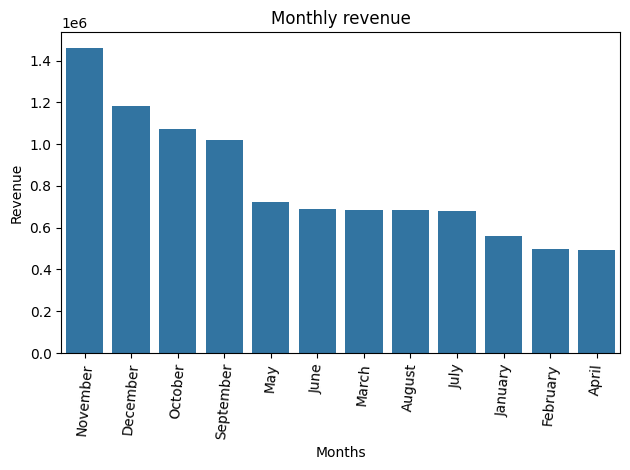

In [26]:
sns.barplot(x='Month',y='TotalPrice',data=df1)
plt.title("Monthly revenue")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

- November is the month where is highest revenue generated.
- In April lowest revenue generated .

### Find out the countries where The most quantity sold.

In [27]:
df2=df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
df2

,Country,Quantity
0,United Kingdom,4263829
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480
5,Australia,83653
6,Sweden,35637
7,Switzerland,30325
8,Spain,26824
9,Japan,25218


In [28]:
Fil_df2=df2[df2['Quantity']<1000000]
Fil_df2

,Country,Quantity
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480
5,Australia,83653
6,Sweden,35637
7,Switzerland,30325
8,Spain,26824
9,Japan,25218


In [29]:
##  We remove the United kingdom because it create problem becomes outliers for other but still will consider as highest quantity saler

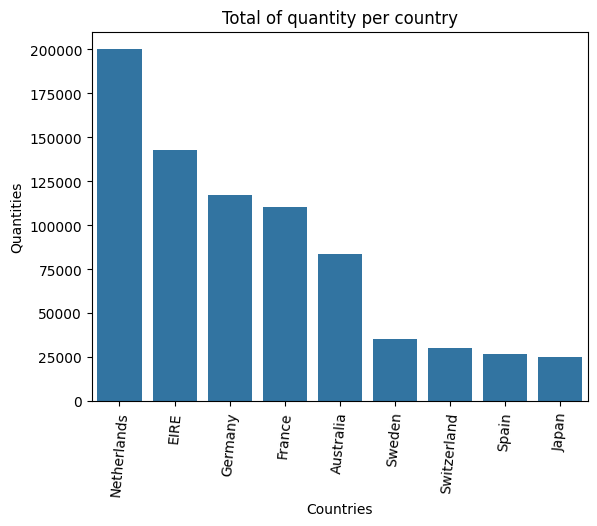

In [30]:
sns.barplot(data=Fil_df2,x='Country',y='Quantity')
plt.title('Total of quantity per country')
plt.xlabel('Countries')
plt.ylabel('Quantities')
plt.xticks(rotation=85)
plt.show()

### Find the total revenue per year.

In [31]:
df3=df.groupby('Year')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
df3

,Year,TotalPrice
0,2011,8998790.914
1,2010,748957.020


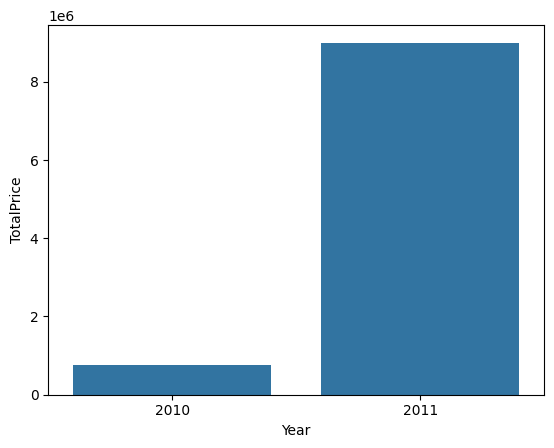

In [32]:
sns.barplot(data=df3,x='Year',y='TotalPrice')

plt.show()

### Find the top ten customers based on revenue

In [33]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,Hour,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,8,December,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,8,December,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010


In [36]:
top_customers=df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top_customers

,CustomerID,TotalPrice
0,Guest,1447682.12
1,14646.0,279489.02
2,18102.0,256438.49
3,17450.0,187482.17
4,14911.0,132572.62
5,12415.0,123725.45
6,14156.0,113384.14
7,17511.0,88125.38
8,16684.0,65892.08
9,13694.0,62653.10


In [37]:
import plotly.express as px

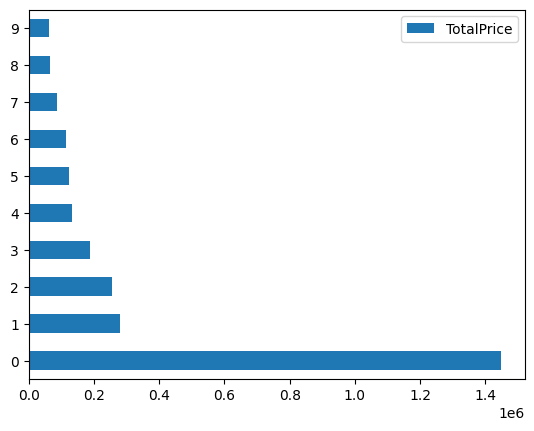

In [50]:
top_customers.plot(kind='barh');
plt.show()

### How many are repeat customers are there?

In [51]:
df['CustomerID'].nunique()

4373

In [55]:
count_id=df['CustomerID'].value_counts().sort_values(ascending=False).head(10).reset_index()
count_id

,CustomerID,count
0,Guest,135080
1,17841.0,7983
2,14911.0,5903
3,14096.0,5128
4,12748.0,4642
5,14606.0,2782
6,15311.0,2491
7,14646.0,2085
8,13089.0,1857
9,13263.0,1677


#### There are unknow customers are also as guest so we can negclet that because we don't know who are they.guest can be a single person or can we different person who does'y provide the customerID

In [59]:
fil_count_id=count_id[count_id['count']<10000]

In [60]:
fil_count_id

,CustomerID,count
1,17841.0,7983
2,14911.0,5903
3,14096.0,5128
4,12748.0,4642
5,14606.0,2782
6,15311.0,2491
7,14646.0,2085
8,13089.0,1857
9,13263.0,1677


- here are so many frequent customers who have made any purchase but not more than 10000.
- "Guest" they are individual customers(as opposed to unknow or guest users who have missing CustomerID)



### What is the average number of items per invoice or count of customerid per invoice?

In [71]:
df.groupby('InvoiceNo').agg({'Quantity':sum,'CustomerID':'count'}).head(10)

C:\Users\Koina Garg\AppData\Local\Temp\ipykernel_12352\165325269.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('InvoiceNo').agg({'Quantity':sum,'CustomerID':'count'}).head(10)


,Quantity,CustomerID
InvoiceNo,,
536365,40,7
536366,12,2
536367,83,12
536368,15,4
536369,3,1
536370,449,20
536371,80,1
536372,12,2
536373,88,16


- Each invoice contains multiple line item.
- This show that many customers buy multiple types of products in one invoice.
- Some customers are bulk buyers.
- some are small and individual purchases.

### On which day the sales are most?

In [75]:
day_sales=df.groupby('DayOfWeek')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
day_sales

,DayOfWeek,TotalPrice
0,Thursday,2112519.000
1,Tuesday,1966182.791
2,Wednesday,1734147.010
3,Monday,1588609.431
4,Friday,1540610.811
5,Sunday,805678.891


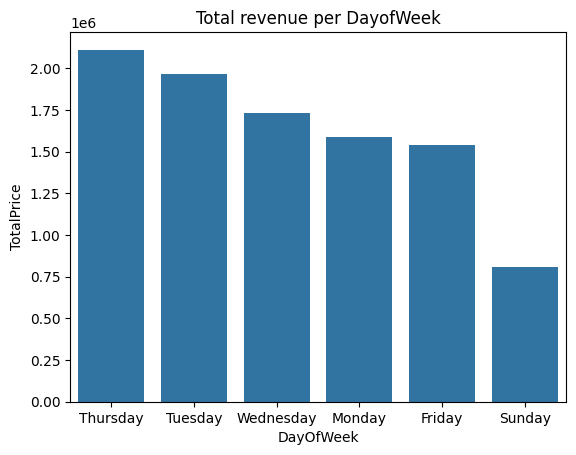

In [79]:
sns.barplot(data=day_sales,x='DayOfWeek',y='TotalPrice')
plt.title("Total revenue per DayofWeek")
plt.show()

- **Thursday** is the day in the company make the most revenue in a week and in **Sunday** make least revenue.
- Point to catch here is that in **Saturday** company is not making any revenue.

### Which are the top ten best selling products 

In [81]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,Hour,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,8,December,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,8,December,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,2010


In [85]:
top_product=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
top_product

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
5,WHITE HANGING HEART T-LIGHT HOLDER,35317
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26315
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753


- These are the top **10** products which are best selling products.
- The quantity of the product is high based on sales.

### Which are the top ten best selling products by revenue?

In [86]:
top_product_cost=df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).reset_index().head(10)
top_product_cost

,Description,TotalPrice
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03
5,RABBIT NIGHT LIGHT,66756.59
6,POSTAGE,66230.64
7,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
8,ASSORTED COLOUR BIRD ORNAMENT,58959.73
9,CHILLI LIGHTS,53768.06


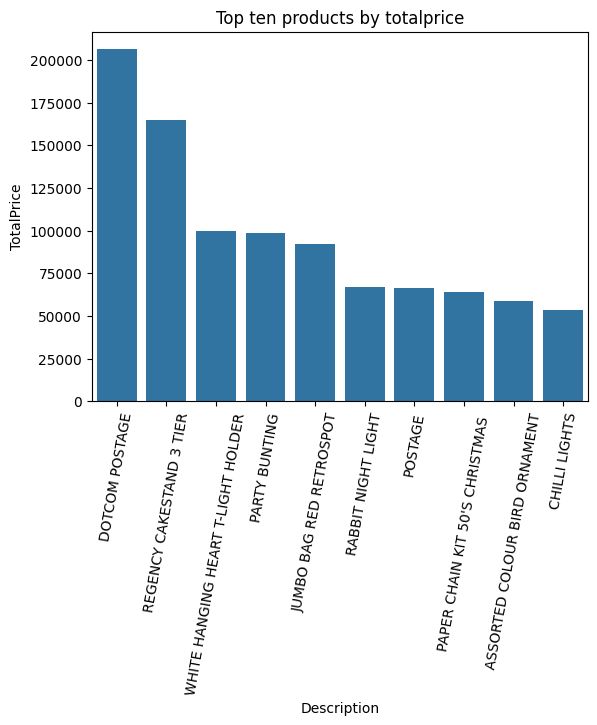

In [94]:
sns.barplot(data=top_product_cost,x='Description',y='TotalPrice')
plt.title("Top ten products by totalprice")
plt.xticks(rotation=80)
plt.show()

### What percanatge of invoices are returns?

In [103]:
total_invoice=df['InvoiceNo'].nunique()
total_invoice

25900

In [104]:
# number of return invoices start with "C"
return_invoice=df[df['InvoiceNo'].astype(str).str.startswith('C')]['InvoiceNo'].nunique()
return_invoice

3836

In [105]:
return_percantage=(return_invoice/total_invoice)*100

In [106]:
return_percantage

14.810810810810812

- There are almost **15 %** of invoices are return- which is quiet significant in any business.

### Do any country with high return?

In [108]:
re_invoice=df[df['InvoiceNo'].astype(str).str.startswith('C')]
re_invoice

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,Hour,Month,Year
141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,Wednesday,9,December,2010
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,Wednesday,9,December,2010
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,Wednesday,10,December,2010
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,Wednesday,10,December,2010
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,Wednesday,10,December,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,Friday,9,December,2011
541541,541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,Friday,10,December,2011
541715,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,Friday,11,December,2011
541716,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,Friday,11,December,2011


In [119]:
unsuall_country=re_invoice.groupby('Country')['Quantity'].sum().sort_values(ascending=True).head(10)
unsuall_country

Country
United Kingdom   -263033
EIRE               -4810
Germany            -1815
France             -1624
USA                -1424
Spain              -1127
Netherlands         -809
Japan               -798
Australia           -556
Sweden              -446
Name: Quantity, dtype: int64

- **United kingdom** is the only country from which the most returns are placed which is almost **2.6 lakhs**.

### In which hour the revenue or quantity sales the most?

In [129]:
df['Hour'].value_counts()

Hour
12    78709
15    77519
13    72259
14    67471
11    57674
16    54516
10    49037
9     34332
17    28509
8      8909
18     7974
19     3705
20      871
7       383
6        41
Name: count, dtype: int64

In [133]:
hour_quantity_sales=df.groupby('Hour')['Quantity'].sum().sort_values(ascending=False).reset_index()
hour_quantity_sales

,Hour,Quantity
0,12,823935
1,10,684416
2,13,676803
3,11,637672
4,15,609710
5,14,571549
6,9,429366
7,16,312317
8,8,158163
9,17,156331


- On **12'o clock (midnoon)** the sales of quantity is high.
- Where as we can see that around at **6'o clock** the sales of quantity goes in negative which show at that time the customers *return the product*.

In [135]:
hourly_revenue=df.groupby('Hour')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
hourly_revenue

,Hour,TotalPrice
0,12,1362484.290
1,10,1329056.521
2,15,1189458.280
3,13,1177506.370
4,11,1147437.920
5,14,1095212.901
6,9,766734.051
7,16,729140.820
8,17,435444.111
9,8,281840.860


- As we see above the sales is high around **12** so the revenue is also high similarly for lowest or negative around at **6**